<a href="https://colab.research.google.com/github/donsuryansh75/Cloud-Native-Monitoring-App/blob/main/Data_Table_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def prepare_data(file_path):
    # Ingest
    df = pd.read_csv('/content/machine_logs.csv')

    # Reformat: Convert timestamps and fix categorical typos
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['status_code'] = df['status_code'].str.replace('Runing', 'Running')

    # Sort by time for temporal analysis
    df = df.sort_values('timestamp')

    # Handle Missing Values: Interpolate temperature
    df['sensor_temp_c'] = df['sensor_temp_c'].interpolate(method='linear')

    return df

In [7]:
def analyze_machine(df):
    plt.figure(figsize=(14, 7))

    # Temperature Trend
    plt.subplot(2, 1, 1)
    sns.lineplot(data=df, x='timestamp', y='sensor_temp_c', color='red')
    plt.title('Bearing Temperature Over Time (Thermal Escalation)')
    plt.ylabel('Celsius')

    # Vibration Spikes
    plt.subplot(2, 1, 2)
    sns.lineplot(data=df, x='timestamp', y='vibration_mm_s', color='blue')
    plt.title('Vibration Levels (Instability Spikes)')
    plt.ylabel('mm/s')

    plt.tight_layout()
    plt.show()

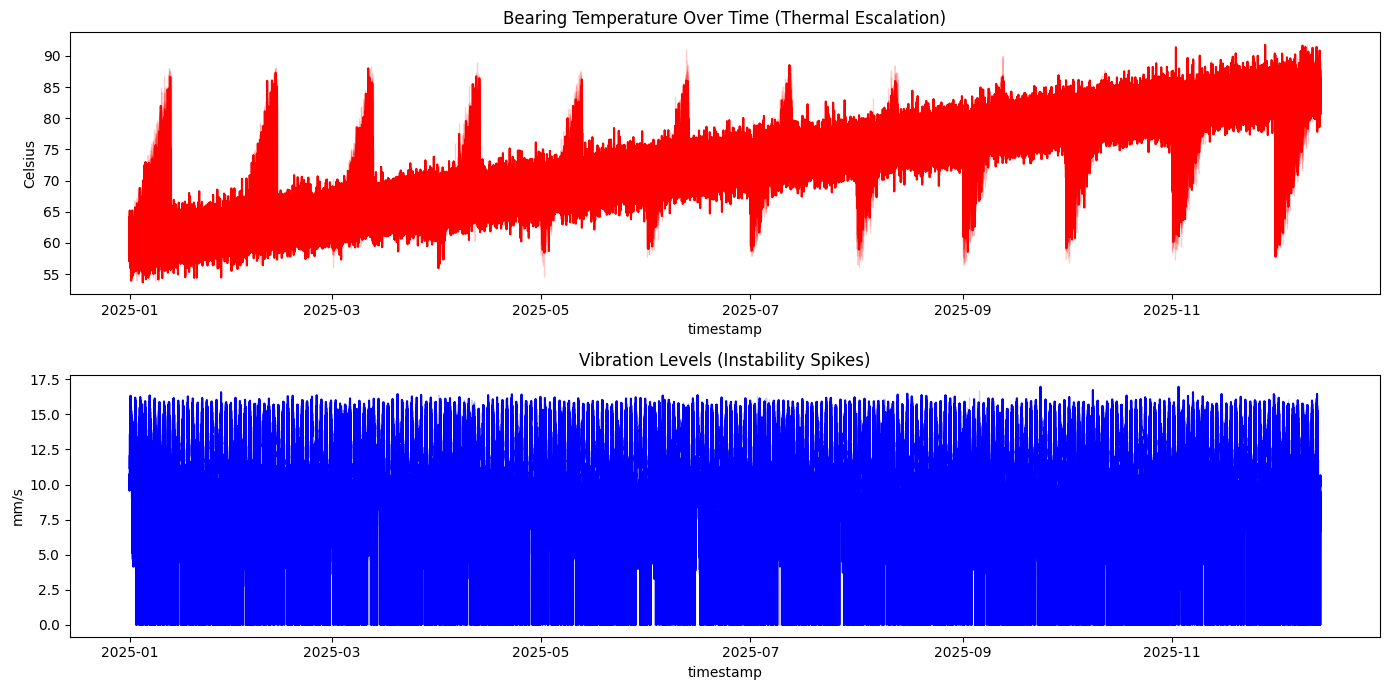

In [8]:
logs_df = prepare_data('machine_logs.csv')
analyze_machine(logs_df)